In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("spam_text_message.csv")

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


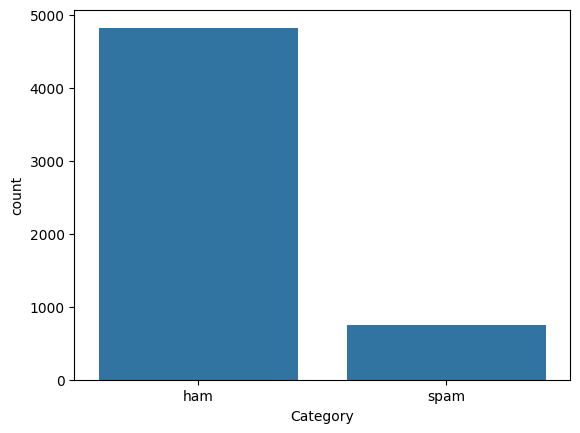

In [6]:
sns.countplot(x=df["Category"])
plt.show()

In [7]:
X=df["Message"]
Y=df["Category"]

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
print(Y)

[0 0 1 ... 0 0 0]


In [12]:

X.shape

(5572,)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2)

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=500
tkn=Tokenizer(num_words=max_words)
tkn.fit_on_texts(X_train)
seq=tkn.texts_to_sequences(X_train)
# print(seq)

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len=100
padded_docs=pad_sequences(seq,padding="pre",maxlen=max_len)
print(padded_docs)


[[  0   0   0 ...   4   8  18]
 [  0   0   0 ...   7  34  82]
 [  0   0   0 ...   2   5 123]
 ...
 [  0   0   0 ...   4  91  48]
 [  0   0   0 ... 431   4  56]
 [  0   0   0 ... 187 340 158]]


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding


embedding_vector_features = 30
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_vector_features, input_length=max_len))
model.add(LSTM(256))
model.add(Dropout(0.5))  # Add dropout to prevent overfitting
model.add(Dense(1, activation="sigmoid"))

model.build(input_shape=(None, max_len))  # Build the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 30)        │       300,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 256)            │       293,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 594,145 (2.27 MB)

 Trainable params: 594,145 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(padded_docs,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.8042 - loss: 0.4915 - val_accuracy: 0.9271 - val_loss: 0.2374
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.9432 - loss: 0.2157 - val_accuracy: 0.9697 - val_loss: 0.1128
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9746 - loss: 0.0982 - val_accuracy: 0.9753 - val_loss: 0.0786
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.9778 - loss: 0.0696 - val_accuracy: 0.9809 - val_loss: 0.0659
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.9836 - loss: 0.0557 - val_accuracy: 0.9854 - val_loss: 0.0659
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9855 - loss: 0.0479 - val_accuracy: 0.9877 - val_loss: 0.0609
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.9914 - loss: 0.0347 - val_accuracy: 0.9843 - val_loss: 0.0603
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9904 - loss: 0.0391 - val_accuracy: 0.

In [33]:
text_seq=tkn.texts_to_sequences(X_test)
test_padded=pad_sequences(text_seq,maxlen=max_len)

In [34]:
accr=model.evaluate(test_padded,Y_test)
print(accr)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9794 - loss: 0.1069
[0.08852675557136536, 0.9802690744400024]
